 ## Lab Cross Validation

1. Apply SMOTE for upsampling the data

- Use logistic regression to fit the model and compute the accuracy of the model.  
- Use decision tree classifier to fit the model and compute the accuracy of the model.  
- Compare the accuracies of the two models.  

In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer-Churn.csv') 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
#From previous lab

df[['TotalCharges']] = df[['TotalCharges']].apply(pd.to_numeric, errors='coerce')

In [5]:
# Also from previous lab
df = df.fillna(df.mean())

In [7]:
# we will use only numerical features 

df_num =df.select_dtypes(np.number)

# let's make a copy for the second part of the lab
df_num1=df_num.copy()

In [10]:
# target variable
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
# SMOTE
# Uses knn to create rows with similar features from the minority classes.
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df_num
y = df['Churn']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [12]:
def logistic_regression_model(X_train, X_test, y_train, y_test):

    # defining a function to apply the logistic regression model
    
    classification = LogisticRegression(random_state=42, max_iter=10000)
    classification.fit(X_train, y_train)
    
    # and to evaluate the model
    score = classification.score(X_test, y_test)
    print('The accuracy score is: ', score, '\n')
      
    predictions = classification.predict(X_test)
    confusion_matrix(y_test, predictions)  
   
    
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True NO', 'False NO',
               'False YES', 'True YES']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print (cf_matrix)

The accuracy score is:  0.7497584541062802 

[[741 280]
 [238 811]]


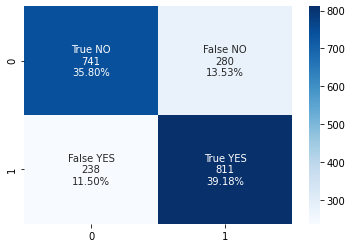

In [13]:
logistic_regression_model(X_train, X_test, y_train, y_test)

In [19]:
def decision_tree_class_model(X_train, X_test, y_train, y_test):
    #= train_test_split(X, y, test_size=0.33)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('The accuracy score is: ', score, '\n')
    
    predictions = model.predict(X_test)
    confusion_matrix(y_test, predictions)  
   
    
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True NO', 'False NO',
               'False YES', 'True YES']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print (cf_matrix)

The accuracy score is:  0.7497584541062802 

[[750 271]
 [247 802]]


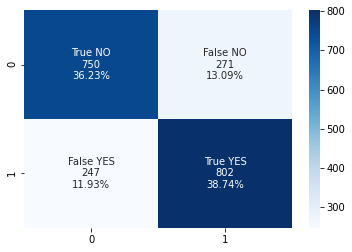

In [27]:
decision_tree_class_model(X_train, X_test, y_train, y_test)

2. Apply TomekLinks for downsampling

- It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
- Use logistic regression to fit the model and compute the accuracy of the model.
- Use decision tree classifier to fit the model and compute the accuracy of the model.
- Compare the accuracies of the two models.
- You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [21]:
# Tomek Links
# Pairs of almost similar rows from opposite classes.
# Removing the row of the majority class from each pair helps the classifier.


X1 = df_num1
y1 = df['Churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X1, y1)
y_tl.value_counts()

No     4620
Yes    1869
Name: Churn, dtype: int64

In [24]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

The accuracy score is:  0.7912172573189522 

[[832  97]
 [174 195]]


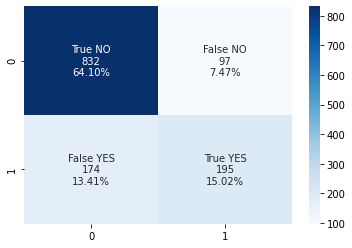

In [25]:
logistic_regression_model(X_train1, X_test1, y_train1, y_test1)

The accuracy score is:  0.7419106317411402 

[[759 170]
 [165 204]]


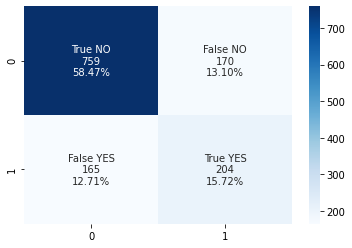

In [28]:
decision_tree_class_model(X_train1, X_test1, y_train1, y_test1)